In [1]:
# Cell 1: Install imbalanced-learn (for SMOTE, ADASYN etc.)
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\sharm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Cell 1: Import necessary libraries & set display options

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# For balancing later
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Show more columns while exploring
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

# Path to datasets folder
DATASET_PATH = "datasets"

# List all CSV files (sorted by date)
csv_files = sorted(glob.glob(os.path.join(DATASET_PATH, "*.csv")))

print("Found", len(csv_files), "files")
print(csv_files[:5])  # preview first 5 files


Found 5 files
['datasets\\02-16-2018.csv', 'datasets\\02-21-2018.csv', 'datasets\\02-28-2018.csv', 'datasets\\03-01-2018.csv', 'datasets\\03-02-2018.csv']


In [3]:
# Cell 2: Load a sample CSV to explore structure and memory usage

sample_file = csv_files[0]  # pick the first file
print("Loading sample file:", sample_file)

# Load with low_memory and no dtype guessing issues
df_sample = pd.read_csv(sample_file, low_memory=False)

print("Shape:", df_sample.shape)
print("\nColumns:", df_sample.columns.tolist())
print("\nData Types:\n", df_sample.dtypes)
print("\nMemory Usage (MB):", round(df_sample.memory_usage(deep=True).sum() / 1024**2, 2))

# Preview top rows
df_sample.head()


Loading sample file: datasets\02-16-2018.csv
Shape: (1048575, 80)

Columns: ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Se

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633341,56300000,138.5929291,56300000,56300000,113000000,56300000,138.5929291,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,138.5929291,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633104,56300000,263.7508294,56300000,56300000,113000000,56300000,263.7508294,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,263.7508294,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,105.0434783,54.5422924,64,0,30.54545455,32.33649716,180.9071464,3.223611385,314911.2576,1145953.758,9058214,66,20700000,940484.2727,1898330.299,9144734,66,20700000,482352.2093,1396411.114,9058214,41601,1,0,0,0,460,880,1.106612863,2.116998521,0,240,56.23529412,53.85168068,2900.003512,0,1,0,0,1,0,0,0,1,57.07462687,105.0434783,30.54545455,0,0,0,0,0,0,23,2416,44,1344,263,255,22,20,2624734,0,2624734,2624734,9058214,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633325,56300000,82.02438662,56300000,56300000,113000000,56300000,82.02438662,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,82.02438662,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,0,0,0,0,0,0,0,100000,20,0,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,50000,50000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,58856,0,0,20,0,0,0,0,0,0,0,0,Benign


In [4]:
# Cell 3: Efficient loading of all CSVs with dtype optimization

def optimize_dtypes(df):
    """
    Downcast numerical columns to save memory.
    """
    for col in df.select_dtypes(include=["int64"]).columns:
        df[col] = pd.to_numeric(df[col], downcast="integer")
    for col in df.select_dtypes(include=["float64"]).columns:
        df[col] = pd.to_numeric(df[col], downcast="float")
    return df

# Load and optimize all datasets
all_data = []
for file in csv_files:
    print(f"Loading {file} ...")
    chunk = pd.read_csv(file, low_memory=False)
    chunk = optimize_dtypes(chunk)
    all_data.append(chunk)

# Concatenate into one DataFrame
df = pd.concat(all_data, ignore_index=True)

print("\nFinal Shape:", df.shape)
print("Memory Usage (MB):", round(df.memory_usage(deep=True).sum() / 1024**2, 2))
df.head()


Loading datasets\02-16-2018.csv ...
Loading datasets\02-21-2018.csv ...
Loading datasets\02-28-2018.csv ...
Loading datasets\03-01-2018.csv ...
Loading datasets\03-02-2018.csv ...

Final Shape: (4089954, 80)
Memory Usage (MB): 14790.43


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633341,56300000,138.5929291,56300000,56300000,113000000,56300000,138.5929291,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,138.5929291,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633104,56300000,263.7508294,56300000,56300000,113000000,56300000,263.7508294,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,263.7508294,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,105.0434783,54.5422924,64,0,30.54545455,32.33649716,180.9071464,3.223611385,314911.2576,1145953.758,9058214,66,20700000,940484.2727,1898330.299,9144734,66,20700000,482352.2093,1396411.114,9058214,41601,1,0,0,0,460,880,1.106612863,2.116998521,0,240,56.23529412,53.85168068,2900.003512,0,1,0,0,1,0,0,0,1,57.07462687,105.0434783,30.54545455,0,0,0,0,0,0,23,2416,44,1344,263,255,22,20,2624734,0,2624734,2624734,9058214,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633325,56300000,82.02438662,56300000,56300000,113000000,56300000,82.02438662,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,82.02438662,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,0,0,0,0,0,0,0,100000,20,0,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,50000,50000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,58856,0,0,20,0,0,0,0,0,0,0,0,Benign


In [5]:
# Cell 4: Basic preprocessing (NaN handling, Timestamp parsing, Label encoding)

# 1. Check missing values
missing_summary = df.isnull().sum()
print("Missing values per column (top 10):\n", missing_summary.sort_values(ascending=False).head(10))

# 2. Parse Timestamp to datetime + extract time-based features
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df["Second"] = df["Timestamp"].dt.second

# 3. Encode Label (Normal vs Attack types etc.)
df["Label"] = df["Label"].astype("category")
df["Label_Code"] = df["Label"].cat.codes

print("\nUnique Labels:", df["Label"].unique())
print("Label Mapping:", dict(enumerate(df["Label"].cat.categories)))

# 4. Final memory check
print("\nMemory Usage (MB):", round(df.memory_usage(deep=True).sum() / 1024**2, 2))

# Preview after preprocessing
df.head()


Missing values per column (top 10):
 Flow Byts/s         8433
Dst Port               0
Bwd Byts/b Avg         0
Fwd Pkts/b Avg         0
Fwd Byts/b Avg         0
Bwd Seg Size Avg       0
Fwd Seg Size Avg       0
Pkt Size Avg           0
Down/Up Ratio          0
ECE Flag Cnt           0
dtype: int64

Unique Labels: ['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Infilteration', 'Bot']
Categories (8, object): ['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'Infilteration', 'Label']
Label Mapping: {0: 'Benign', 1: 'Bot', 2: 'DDOS attack-HOIC', 3: 'DDOS attack-LOIC-UDP', 4: 'DoS attacks-Hulk', 5: 'DoS attacks-SlowHTTPTest', 6: 'Infilteration', 7: 'Label'}

Memory Usage (MB): 14460.85


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second,Label_Code
0,0,0,2018-02-16 08:27:23,112640768,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633341,56300000,138.5929291,56300000,56300000,113000000,56300000,138.5929291,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,138.5929291,56300000,56300000,Benign,2018.0,2.0,16.0,8.0,27.0,23.0,0
1,0,0,2018-02-16 08:30:12,112641773,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633104,56300000,263.7508294,56300000,56300000,113000000,56300000,263.7508294,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,263.7508294,56300000,56300000,Benign,2018.0,2.0,16.0,8.0,30.0,12.0,0
2,35605,6,2018-02-16 08:26:55,20784143,23,44,2416,1344,240,64,105.0434783,54.5422924,64,0,30.54545455,32.33649716,180.9071464,3.223611385,314911.2576,1145953.758,9058214,66,20700000,940484.2727,1898330.299,9144734,66,20700000,482352.2093,1396411.114,9058214,41601,1,0,0,0,460,880,1.106612863,2.116998521,0,240,56.23529412,53.85168068,2900.003512,0,1,0,0,1,0,0,0,1,57.07462687,105.0434783,30.54545455,0,0,0,0,0,0,23,2416,44,1344,263,255,22,20,2624734,0,2624734,2624734,9058214,0,9058214,9058214,Benign,2018.0,2.0,16.0,8.0,26.0,55.0,0
3,0,0,2018-02-16 08:33:01,112640836,3,0,0,0,0,0,0,0,0,0,0,0,0,0.026633325,56300000,82.02438662,56300000,56300000,113000000,56300000,82.02438662,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,82.02438662,56300000,56300000,Benign,2018.0,2.0,16.0,8.0,33.0,1.0,0
4,23,6,2018-02-16 08:27:59,20,1,1,0,0,0,0,0,0,0,0,0,0,0,100000,20,0,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,50000,50000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,58856,0,0,20,0,0,0,0,0,0,0,0,Benign,2018.0,2.0,16.0,8.0,27.0,59.0,0


In [6]:
# Cell 5 (Fix): Ensure numeric columns before feature engineering

# List of columns we need for interaction features
num_cols = ["Tot Fwd Pkts", "Tot Bwd Pkts", "TotLen Fwd Pkts", "TotLen Bwd Pkts", 
            "Flow Duration", "Flow Byts/s"]

# Convert to numeric (force errors to NaN, then fill with 0)
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# 1. Fill missing values (already handled but double-check Flow Byts/s)
df["Flow Byts/s"].fillna(0, inplace=True)

# 2. Interaction Features (ratios and differences)
df["Pkt_Ratio_Fwd_Bwd"] = (df["Tot Fwd Pkts"] + 1) / (df["Tot Bwd Pkts"] + 1)
df["Len_Ratio_Fwd_Bwd"] = (df["TotLen Fwd Pkts"] + 1) / (df["TotLen Bwd Pkts"] + 1)

df["Pkt_Diff_Fwd_Bwd"] = df["Tot Fwd Pkts"] - df["Tot Bwd Pkts"]
df["Len_Diff_Fwd_Bwd"] = df["TotLen Fwd Pkts"] - df["TotLen Bwd Pkts"]

# 3. Rolling Features (group by Hour to capture traffic bursts)
df = df.sort_values("Timestamp")

df["Fwd_Pkts_RollMean"] = df.groupby("Hour")["Tot Fwd Pkts"].transform(lambda x: x.rolling(1000, min_periods=1).mean())
df["Bwd_Pkts_RollMean"] = df.groupby("Hour")["Tot Bwd Pkts"].transform(lambda x: x.rolling(1000, min_periods=1).mean())
df["Flow_Duration_RollStd"] = df.groupby("Hour")["Flow Duration"].transform(lambda x: x.rolling(1000, min_periods=1).std())

print("✅ Feature engineering successful. New columns added.")
df.head()


✅ Feature engineering successful. New columns added.


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second,Label_Code,Pkt_Ratio_Fwd_Bwd,Len_Ratio_Fwd_Bwd,Pkt_Diff_Fwd_Bwd,Len_Diff_Fwd_Bwd,Fwd_Pkts_RollMean,Bwd_Pkts_RollMean,Flow_Duration_RollStd
91659,0,0,2018-02-16 01:00:32,112640723.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000000,0.026633352,56300000,101.1162697,56300000,56300000,113000000,56300000,101.1162697,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,101.1162697,56300000,56300000,Benign,2018.0,2.0,16.0,1.0,0.0,32.0,0,4.000000,1.000000,3.0,0.0,3.000000,0.00,NaN
91658,22,6,2018-02-16 01:01:42,2146470.0,14.0,12.0,1335.0,2273.0,744,0,95.35714286,200.7882954,976,0,189.4166667,347.6425694,1680.899337,12.11291097,85858.8,119549.868,260447,11,2146470,165113.0769,135202.6351,295321,18,1891154,171923.0909,127776.4691,300492,83,0,0,0,0,456,392,6.522336674,5.590574292,0,976,133.6296296,272.3986259,74201.0114,0,0,0,1,0,0,0,0,0,138.7692308,95.35714286,189.4166667,0,0,0,0,0,0,14,1335,12,2273,27200,233,8,32,0,0,0,0,0,0,0,0,Benign,2018.0,2.0,16.0,1.0,1.0,42.0,0,1.153846,0.587511,2.0,-938.0,8.500000,6.00,7.813124e+07
91661,0,0,2018-02-16 01:03:21,112640737.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000000,0.026633348,56300000,17.67766953,56300000,56300000,113000000,56300000,17.67766953,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,17.67766953,56300000,56300000,Benign,2018.0,2.0,16.0,1.0,3.0,21.0,0,4.000000,1.000000,3.0,0.0,6.666667,4.00,6.379389e+07
91689,67,17,2018-02-16 01:03:50,721.0,1.0,1.0,300.0,329.0,300,300,300,0,329,329,329,0,872399.445200,2773.925104,721,0,721,721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,1386.962552,1386.962552,300,329,309.6666667,16.74315781,280.3333333,0,0,0,0,0,0,0,0,1,464.5,300,329,0,0,0,0,0,0,1,300,1,329,-1,-1,0,8,0,0,0,0,0,0,0,0,Benign,2018.0,2.0,16.0,1.0,3.0,50.0,0,1.000000,0.912121,0.0,-29.0,5.250000,3.25,6.441927e+07
91663,0,0,2018-02-16 01:06:10,112640647.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000000,0.02663337,56300000,58.68986284,56300000,56300000,113000000,56300000,58.68986284,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.02663337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56300000,58.68986284,56300000,56300000,Benign,2018.0,2.0,16.0,1.0,6.0,10.0,0,4.000000,1.000000,3.0,0.0,4.800000,2.60,6.111253e+07


In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Drop non-numeric columns
X = df.drop(columns=["Label", "Label_Code", "Timestamp"])
X = X.select_dtypes(include=["int64", "float64"])  # keep only numeric features
y = df["Label_Code"]

# Convert to float32 for efficiency
X = X.astype("float32")

# Handle NaN / inf before resampling
from sklearn.impute import SimpleImputer
import numpy as np

X = np.where(np.isinf(X), np.nan, X)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# ✅ Apply SMOTE (instead of ADASYN)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape after balancing:", X_resampled.shape)
print("Resampled Class Distribution:", Counter(y_resampled))


Shape after balancing: (18817808, 19)
Resampled Class Distribution: Counter({0: 2352226, 4: 2352226, 5: 2352226, 2: 2352226, 3: 2352226, 6: 2352226, 1: 2352226, 7: 2352226})


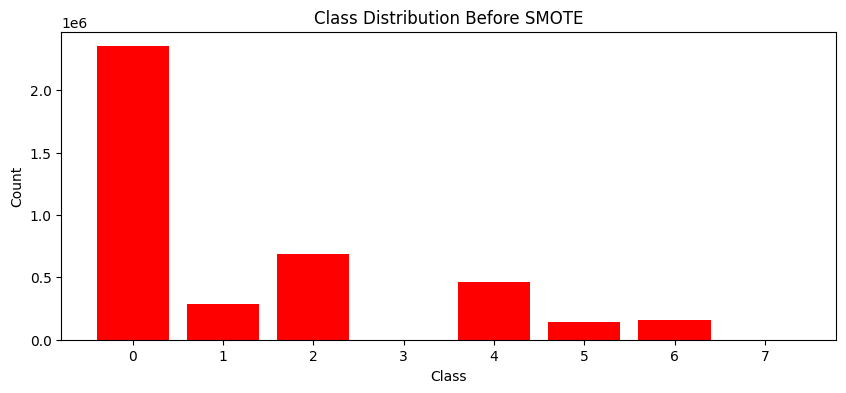

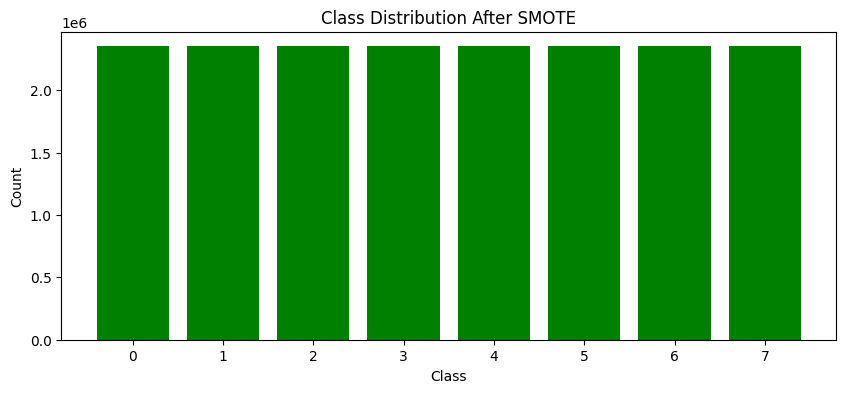

In [8]:
import matplotlib.pyplot as plt

# Before
plt.figure(figsize=(10,4))
plt.bar(Counter(y).keys(), Counter(y).values(), color='red')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# After
plt.figure(figsize=(10,4))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='green')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [9]:
from collections import Counter
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 2352226, 2: 686012, 4: 461912, 1: 286191, 6: 161934, 5: 139890, 3: 1730, 7: 59})
After SMOTE: Counter({0: 2352226, 4: 2352226, 5: 2352226, 2: 2352226, 3: 2352226, 6: 2352226, 1: 2352226, 7: 2352226})


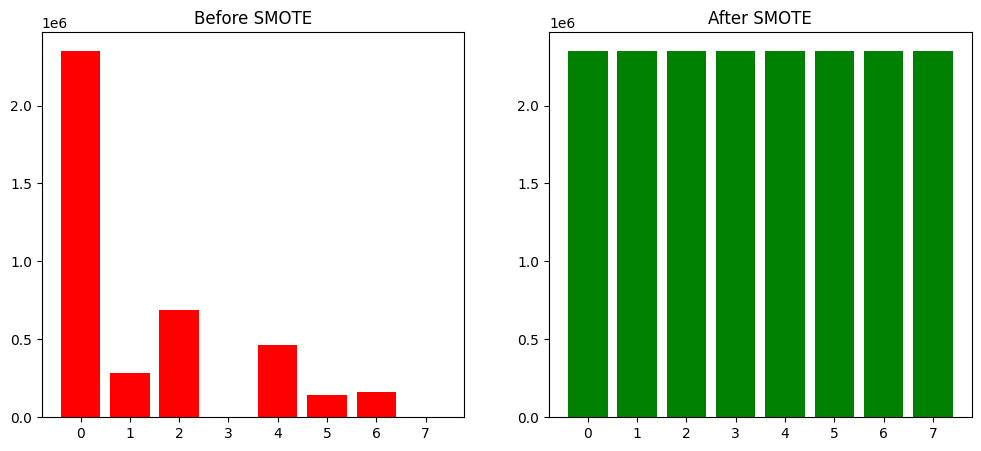

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(Counter(y).keys(), Counter(y).values(), color='red')
ax[0].set_title("Before SMOTE")

ax[1].bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='green')
ax[1].set_title("After SMOTE")

plt.show()


In [11]:
counts_before = Counter(y)
counts_after = Counter(y_resampled)

minority = min(counts_before, key=counts_before.get)
growth = (counts_after[minority] - counts_before[minority]) / counts_before[minority] * 100
print(f"Minority class grew by {growth:.1f}% after SMOTE")



Minority class grew by 3986723.7% after SMOTE


In [12]:
# Cell X: Normalization / Scaling (fixed)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Select numeric features only
num_features = df.select_dtypes(include=["int64", "float64"]).columns

# Replace inf with NaN
df[num_features] = df[num_features].replace([np.inf, -np.inf], np.nan)

# Impute missing values with column mean
imputer = SimpleImputer(strategy="mean")
df[num_features] = imputer.fit_transform(df[num_features])

# Standard Scaler (zero mean, unit variance)
scaler_std = StandardScaler()
df[num_features] = scaler_std.fit_transform(df[num_features])

# ✅ If you prefer MinMax instead, uncomment this:
# scaler_mm = MinMaxScaler()
# df[num_features] = scaler_mm.fit_transform(df[num_features])

print("✅ Scaling complete. Numeric features cleaned and standardized.")
df[num_features].head()


✅ Scaling complete. Numeric features cleaned and standardized.


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Flow Byts/s,Year,Month,Day,Hour,Minute,Second,Pkt_Ratio_Fwd_Bwd,Len_Ratio_Fwd_Bwd,Pkt_Diff_Fwd_Bwd,Len_Diff_Fwd_Bwd,Fwd_Pkts_RollMean,Bwd_Pkts_RollMean,Flow_Duration_RollStd
91659,4.549060,-0.020564,-0.029437,-0.018644,-0.012130,-0.075151,0.0,-0.713492,0.178195,-0.848364,-2.071566,0.145167,-0.019197,-0.020129,-0.019003,0.000923,-0.031302,-0.473063,0.000000
91658,-0.194848,-0.016135,0.062087,-0.006442,0.000192,-0.074468,0.0,-0.713492,0.178195,-0.848364,-2.006018,0.727422,-0.020344,-0.020134,-0.019406,-0.003456,-0.027931,0.263644,3.996119
91661,4.549060,-0.020564,-0.029437,-0.018644,-0.012130,-0.075151,0.0,-0.713492,0.178195,-0.848364,-1.874922,-0.495314,-0.019197,-0.020129,-0.019003,0.000923,-0.029055,0.018075,3.078084
91689,-0.286972,-0.021370,-0.021810,-0.015902,-0.010346,0.279043,0.0,-0.713492,0.178195,-0.848364,-1.874922,1.193226,-0.020406,-0.020130,-0.020211,0.000787,-0.029923,-0.074014,3.118128
91663,4.549057,-0.020564,-0.029437,-0.018644,-0.012130,-0.075151,0.0,-0.713492,0.178195,-0.848364,-1.678277,-1.135794,-0.019197,-0.020129,-0.019003,0.000923,-0.030199,-0.153823,2.906394


In [13]:
# Cell X+1: Autoencoder for feature embeddings (PyTorch version)

!pip install torch torchvision torchaudio

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert numeric features to tensor
X_auto = df[num_features].astype("float32").values
X_tensor = torch.tensor(X_auto)

dataset = TensorDataset(X_tensor, X_tensor)
loader = DataLoader(dataset, batch_size=256, shuffle=True)

# Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=20):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent

# Initialize model
input_dim = X_auto.shape[1]
latent_dim = 20
model = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train
for epoch in range(10):
    total_loss = 0
    for batch_x, _ in loader:
        optimizer.zero_grad()
        reconstructed, _ = model(batch_x)
        loss = criterion(reconstructed, batch_x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader):.4f}")

# Extract latent features
with torch.no_grad():
    _, latent_features = model(X_tensor)

latent_df = pd.DataFrame(latent_features.numpy(), columns=[f"latent_{i}" for i in range(latent_dim)])

# Merge into df
df = pd.concat([df.reset_index(drop=True), latent_df], axis=1)
print("✅ Autoencoder latent features added (PyTorch). Shape:", df.shape)
df.head()




[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\sharm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Epoch 1, Loss: 0.0766
Epoch 2, Loss: 0.0288
Epoch 3, Loss: 0.0208
Epoch 4, Loss: 0.0613
Epoch 5, Loss: 0.0335
Epoch 6, Loss: 0.0398
Epoch 7, Loss: 0.0344
Epoch 8, Loss: 0.0300
Epoch 9, Loss: 0.0326
Epoch 10, Loss: 0.0705
✅ Autoencoder latent features added (PyTorch). Shape: (4089954, 114)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,...,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second,Label_Code,Pkt_Ratio_Fwd_Bwd,Len_Ratio_Fwd_Bwd,Pkt_Diff_Fwd_Bwd,Len_Diff_Fwd_Bwd,Fwd_Pkts_RollMean,Bwd_Pkts_RollMean,Flow_Duration_RollStd,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16,latent_17,latent_18,latent_19
0,0,0,2018-02-16 01:00:32,4.549060,-0.020564,-0.029437,-0.018644,-0.012130,0,0,0,0,0,0,0,0,-0.075151,0.026633352,56300000,101.1162697,56300000,56300000,113000000,56300000,101.1162697,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633352,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,-1,0,0,0,0,0,0,56300000,101.1162697,56300000,56300000,Benign,0.0,-0.713492,0.178195,-0.848364,-2.071566,0.145167,0,-0.019197,-0.020129,-0.019003,0.000923,-0.031302,-0.473063,0.000000,0.241091,0.220337,1.800896,0.700319,-0.703109,0.100067,1.870743,1.224311,0.019432,-0.084551,-0.043561,-0.056205,0.410419,0.322116,0.447431,0.744533,-0.634103,-0.851832,1.498361,-2.536126
1,22,6,2018-02-16 01:01:42,-0.194848,-0.016135,0.062087,-0.006442,0.000192,744,0,95.35714286,200.7882954,976,0,189.4166667,347.6425694,-0.074468,12.11291097,85858.8,119549.868,260447,11,2146470,165113.0769,135202.6351,295321,18,1891154,171923.0909,127776.4691,300492,83,0,0,0,0,456,392,6.522336674,5.590574292,0,976,133.6296296,272.3986259,74201.0114,0,0,0,1,0,...,1335,12,2273,27200,233,8,32,0,0,0,0,0,0,0,0,Benign,0.0,-0.713492,0.178195,-0.848364,-2.006018,0.727422,0,-0.020344,-0.020134,-0.019406,-0.003456,-0.027931,0.263644,3.996119,1.434945,0.153727,2.608190,2.679666,0.406804,0.759804,2.456996,1.498962,-0.706404,-1.759803,0.335639,-0.729219,-1.880180,1.070915,0.184797,1.158873,-2.380863,0.120581,2.177970,-2.942900
2,0,0,2018-02-16 01:03:21,4.549060,-0.020564,-0.029437,-0.018644,-0.012130,0,0,0,0,0,0,0,0,-0.075151,0.026633348,56300000,17.67766953,56300000,56300000,113000000,56300000,17.67766953,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.026633348,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,-1,0,0,0,0,0,0,56300000,17.67766953,56300000,56300000,Benign,0.0,-0.713492,0.178195,-0.848364,-1.874922,-0.495314,0,-0.019197,-0.020129,-0.019003,0.000923,-0.029055,0.018075,3.078084,0.841111,0.344435,2.384086,1.337768,-0.350114,0.640215,2.694788,1.945960,0.193354,-0.314581,0.110153,-0.643954,0.106420,0.298181,0.545443,0.901290,-1.164363,-0.264900,1.854574,-3.023451
3,67,17,2018-02-16 01:03:50,-0.286972,-0.021370,-0.021810,-0.015902,-0.010346,300,300,300,0,329,329,329,0,0.279043,2773.925104,721,0,721,721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,1386.962552,1386.962552,300,329,309.6666667,16.74315781,280.3333333,0,0,0,0,0,...,300,1,329,-1,-1,0,8,0,0,0,0,0,0,0,0,Benign,0.0,-0.713492,0.178195,-0.848364,-1.874922,1.193226,0,-0.020406,-0.020130,-0.020211,0.000787,-0.029923,-0.074014,3.118128,1.073902,-0.093872,2.251556,2.192817,0.291185,0.671644,1.993337,1.126024,-0.661420,-1.602206,0.209556,-0.360253,-1.721810,1.024391,0.245716,1.080651,-2.093957,-0.032025,1.941901,-2.543812
4,0,0,2018-02-16 01:06:10,4.549057,-0.020564,-0.029437,-0.018644,-0.012130,0,0,0,0,0,0,0,0,-0.075151,0.02663337,56300000,58.68986284,56300000,563000

In [14]:
from imblearn.over_sampling import SMOTE

# Step 1: SMOTE first
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 2: Then ADASYN
adasyn = ADASYN(n_neighbors=3, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)

print("✅ Final ADASYN distribution:", Counter(y_adasyn))



✅ Final ADASYN distribution: Counter({0: 2352226, 4: 2352226, 5: 2352226, 2: 2352226, 3: 2352226, 6: 2352226, 1: 2352226, 7: 2352226})


In [15]:
# Ensure columns are numeric
cols_to_fix = ['Flow Duration', 'Fwd Pkt Len Max', 'Flow Byts/s', 
               'Flow Pkts/s', 'Pkt Len Var', 'Pkt Len Mean', 
               'Tot Fwd Pkts', 'Tot Bwd Pkts', 
               'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 
               'Fwd Header Len', 'Bwd Header Len',
               'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
               'Flow IAT Mean', 'Flow IAT Max']

for col in cols_to_fix:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid values → NaN

In [16]:
print("Creating advanced feature interactions...")

# More sophisticated interactions
df['flow_duration_x_max_pkt'] = df['Flow Duration'] * df['Fwd Pkt Len Max']
df['bytes_per_second_efficiency'] = df['Flow Byts/s'] / (df['Flow Pkts/s'] + 1e-8)
df['packet_size_variance_ratio'] = df['Pkt Len Var'] / (df['Pkt Len Mean'] + 1e-8)

# Multiplicative features
df['total_packets'] = df['Tot Fwd Pkts'] + df['Tot Bwd Pkts']
df['total_bytes'] = df['TotLen Fwd Pkts'] + df['TotLen Bwd Pkts']
df['avg_packet_size'] = df['total_bytes'] / (df['total_packets'] + 1e-8)

# Advanced ratios
df['header_to_data_ratio'] = (df['Fwd Header Len'] + df['Bwd Header Len']) / (df['total_bytes'] + 1e-8)
df['flag_density'] = (df['FIN Flag Cnt'] + df['SYN Flag Cnt'] + df['RST Flag Cnt']) / (df['total_packets'] + 1e-8)

# Log transformations for highly skewed features
skewed_features = ['Flow Duration', 'Flow Byts/s', 'Flow IAT Mean', 'Flow IAT Max']
for feat in skewed_features:
    if feat in df.columns:
        df[f'{feat}_log'] = np.log1p(df[feat].clip(lower=0))

print(f"✅ Advanced interactions added. New shape: {df.shape}")

Creating advanced feature interactions...
✅ Advanced interactions added. New shape: (4089954, 126)


In [17]:
print("Creating enhanced rolling features...")

# Sort by timestamp for proper rolling calculations
df_sorted = df.sort_values('Timestamp').reset_index(drop=True)

# More sophisticated rolling features
def create_rolling_features(df, window_sizes=[100, 500, 1000]):
    """Create multiple rolling window features"""
    
    for window in window_sizes:
        # Rolling statistics for key features
        df[f'Flow_Duration_rolling_mean_{window}'] = df['Flow Duration'].rolling(window, min_periods=1).mean()
        df[f'Flow_Duration_rolling_std_{window}'] = df['Flow Duration'].rolling(window, min_periods=1).std()
        df[f'Bytes_rolling_max_{window}'] = df['total_bytes'].rolling(window, min_periods=1).max()
        df[f'Packets_rolling_median_{window}'] = df['total_packets'].rolling(window, min_periods=1).median()
        
        # Rolling skewness and kurtosis
        df[f'Flow_Duration_rolling_skew_{window}'] = df['Flow Duration'].rolling(window, min_periods=1).skew()
        df[f'Packets_rolling_kurt_{window}'] = df['total_packets'].rolling(window, min_periods=1).kurt()
    
    return df

df_sorted = create_rolling_features(df_sorted)

# Lag features (previous values)
lag_features = ['Flow Duration', 'total_bytes', 'total_packets']
for feat in lag_features:
    df_sorted[f'{feat}_lag_1'] = df_sorted[feat].shift(1)
    df_sorted[f'{feat}_lag_5'] = df_sorted[feat].shift(5)

# Exponential moving averages
alpha = 0.3
df_sorted['Flow_Duration_ema'] = df_sorted['Flow Duration'].ewm(alpha=alpha).mean()
df_sorted['Bytes_ema'] = df_sorted['total_bytes'].ewm(alpha=alpha).mean()

print(f"✅ Enhanced rolling features added. New shape: {df_sorted.shape}")

Creating enhanced rolling features...
✅ Enhanced rolling features added. New shape: (4089954, 152)
